# A discussion of the sample distribution vs the sample means
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/course_objective_analysis/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/course_objective_analysis/blob/main/code/sample_vs_sample_means.ipynb)

_The data used here comes from Prof. Jennifer Kay's course at CU-Boulder._

We are going to discuss the sample distribution and the distribution of sample means (and why not throw in some hypothesis testing while we're at it?) using snow pack data from Loveland Pass and the ENSO index.

In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
print('IN_COLAB = ' + str(IN_COLAB))

IN_COLAB = True


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import scipy.stats as stats
import seaborn as sns
import pandas as pd

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

In [3]:
# load some data
if IN_COLAB:
    !pip install wget
    import wget
    filename = wget.download("https://raw.githubusercontent.com/eabarnes1010/course_objective_analysis/main/data/snow_enso_data.csv")        
else:
    filename = '../data/snow_enso_data.csv'
data = pd.read_csv(filename,sep=',')
data.head()

,Year,LovelandPass_April1SWE_inches,Nino34_anomaly_prevDec
0,1936,15.8,-0.04
1,1937,10.1,0.63
2,1938,12.1,0.22
3,1939,18.2,-0.79
4,1940,10.0,0.05


Before anything else, let's look a bit at the data.

In [4]:
SWE_avg=data['LovelandPass_April1SWE_inches'].mean()
SWE_std=data['LovelandPass_April1SWE_inches'].std()
N_SWE=len(data.LovelandPass_April1SWE_inches)

print('---- General Stats. ----')
print('mean SWE = ' + str(SWE_avg))
print('std SWE = ' + str(SWE_std))
print('number of Aprils = ' + str(N_SWE))

---- General Stats. ----
mean SWE = 16.33456790123457
std SWE = 4.221112427246731
number of Aprils = 81


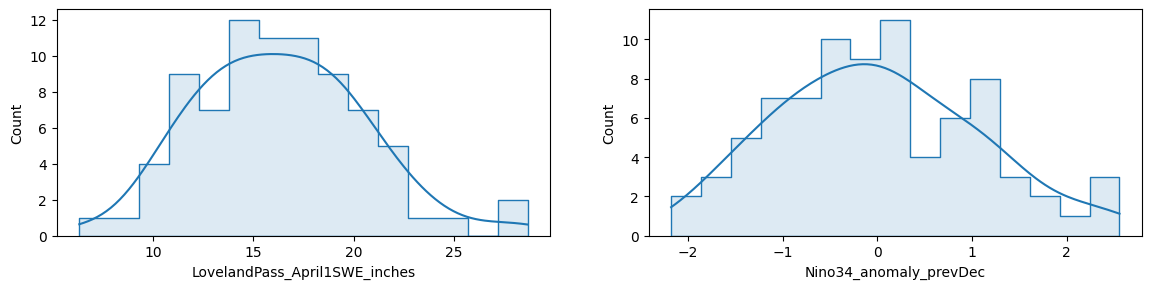

In [5]:
plt.subplots(1,2,figsize=(14,3))
plt.subplot(1,2,1)
sns.histplot(data=data['LovelandPass_April1SWE_inches'], 
             bins=15,
             kde=True, 
             element='step',
             alpha = .15,
             )
plt.subplot(1,2,2)
sns.histplot(data=data['Nino34_anomaly_prevDec'], 
             bins=15,
             kde=True, 
             element='step',
             alpha = .15,
             )
plt.show()

Let's take a look at SWE following a La Nina year and see if things look any different.

In [6]:
SWE_avg_nina=data[data.Nino34_anomaly_prevDec<-1.0]['LovelandPass_April1SWE_inches'].mean()
SWE_std_nina=data[data.Nino34_anomaly_prevDec<-1.0]['LovelandPass_April1SWE_inches'].std()
N_SWE_nina=len(data[data.Nino34_anomaly_prevDec<-1.0].LovelandPass_April1SWE_inches)

print('---- La Nina ----')
print('mean SWE = ' + str(SWE_avg_nina))
print('std SWE = ' + str(SWE_std_nina))
print('number of Aprils = ' + str(N_SWE_nina))

print('\n---- General Stats. ----')
print('mean SWE = ' + str(SWE_avg))
print('std SWE = ' + str(SWE_std))
print('number of Aprils = ' + str(N_SWE))

---- La Nina ----
mean SWE = 17.779999999999998
std SWE = 4.1063017772339006
number of Aprils = 15

---- General Stats. ----
mean SWE = 16.33456790123457
std SWE = 4.221112427246731
number of Aprils = 81


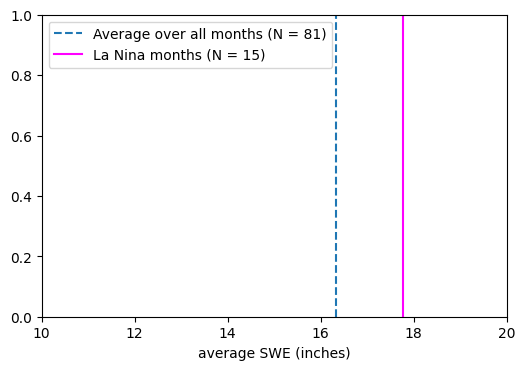

In [7]:
plt.figure()
plt.axvline(x=SWE_avg, linestyle='--',label='Average over all months (N = ' + str(N_SWE) + ')')
plt.axvline(x=SWE_avg_nina, label='La Nina months (N = ' + str(N_SWE_nina) + ')',color='fuchsia')
plt.xlabel('average SWE (inches)')
plt.xlim(10,20)
plt.legend()
plt.show()

But are these averages meaningfully different from one another? An N=15 is not a very large sample, so there must be some noise in there.

## Bootstrapping
Let's use bootstrapping to get a feeling for the type of means one could get with a sample size of 15 (if we randomly choose the 15 samples). We will compute 5,000 sample means, each of size N=15.

In [8]:
bootstrap_means = np.empty((5_000,))
sample_size_N = 15

for loop in np.arange(0,len(bootstrap_means)):
    sample = np.random.choice(data['LovelandPass_April1SWE_inches'].values.flatten(),sample_size_N)
    sampleMean = np.mean(sample)
    bootstrap_means[loop] = sampleMean

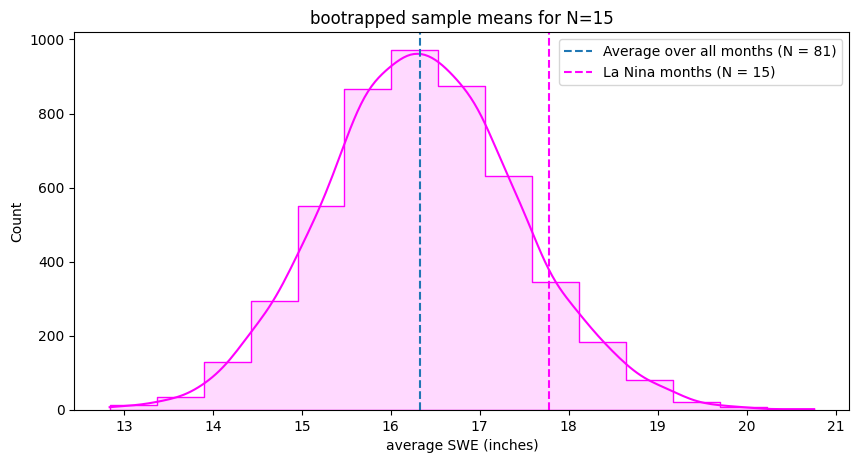

In [9]:
# plot the results of bootstrapping
plt.subplots(1,1,figsize=(10,5))
plt.subplot(1,1,1)
sns.histplot(data=bootstrap_means, 
             bins=15,
             color='fuchsia',
             kde=True, 
             element='step',
             alpha = .15,
             )
plt.xlabel('average SWE (inches)')
plt.title('bootrapped sample means for N=' + str(sample_size_N))
plt.axvline(x=SWE_avg, linestyle='--',label='Average over all months (N = ' + str(N_SWE) + ')')
plt.axvline(x=SWE_avg_nina, linestyle='--',label='La Nina months (N = ' + str(N_SWE_nina) + ')',color='fuchsia')
plt.legend()

plt.show()

So, the pink distribution shows the 5,000 bootstrapped sample means (each of size N=15). We can plot the average over all months in the blue dashed line and the average over only La Nina months in the pink dashed line. _Note that comparing the blue line to the pink distribution is NOT fair, as the blue line is from a sample mean of N=81...not 15!_

Some of you have been seeming to randomly choose the number of samples in your sample means for bootstrapping, but this is not correct. You do not get to choose the sample size (the problem specified that for you, it must be N=15 since that is the number of actual La Ninas that have occurred). You only get to choose the number of boostrapped means that you compute. Let's look at this a bit more.

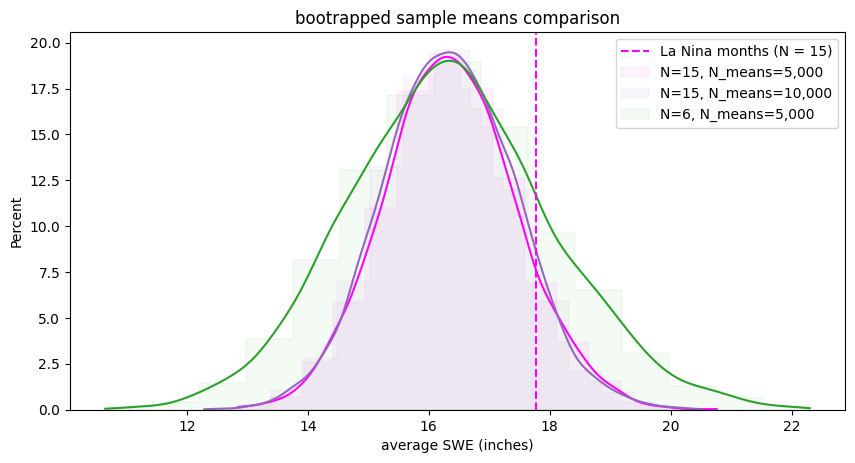

In [11]:
bootstrap_means_more = np.empty((10_000,))
sample_size_N_more = 15
for loop in np.arange(0,len(bootstrap_means_more)):
    sample = np.random.choice(data['LovelandPass_April1SWE_inches'].values.flatten(),sample_size_N_more)
    sampleMean = np.mean(sample)
    bootstrap_means_more[loop] = sampleMean

bootstrap_means_wrong = np.empty((5_000,))
sample_size_N_wrong = 6
for loop in np.arange(0,len(bootstrap_means_wrong)):
    sample = np.random.choice(data['LovelandPass_April1SWE_inches'].values.flatten(),sample_size_N_wrong)
    sampleMean = np.mean(sample)
    bootstrap_means_wrong[loop] = sampleMean    



# plot the results of bootstrapping
LW = .05

plt.subplots(1,1,figsize=(10,5))
plt.subplot(1,1,1)
sns.histplot(data=bootstrap_means, 
             bins=15,
             color='fuchsia',
             kde=True, 
             linewidth=LW,
             element='step',
             stat='percent',
             alpha = .05,
             label='N=15, N_means=5,000'
             )
sns.histplot(data=bootstrap_means_more, 
             bins=15,
             color='tab:purple',
             kde=True, 
             linewidth=LW,
             element='step',
             stat='percent',
             alpha = .05,
             label='N=15, N_means=10,000'
             )
sns.histplot(data=bootstrap_means_wrong, 
             bins=15,
             color='tab:green',
             kde=True, 
             linewidth=LW,
             element='step',
             stat='percent',
             alpha = .05,
             label='N=6, N_means=5,000'
             )


plt.xlabel('average SWE (inches)')
plt.title('bootrapped sample means comparison')
plt.axvline(x=SWE_avg_nina, linestyle='--',label='La Nina months (N = ' + str(N_SWE_nina) + ')',color='fuchsia')
plt.legend()

plt.show()

OK - so doing more boostrapped means compares well with what we originally did (compare purple and pink lines). But choosing an incorrect sample size (green line) just gives you a totally different plot!

OK - returning to our original distribution of SWE (blue) and the boostrapped sample means for N=15 (pink) - let's compare them!

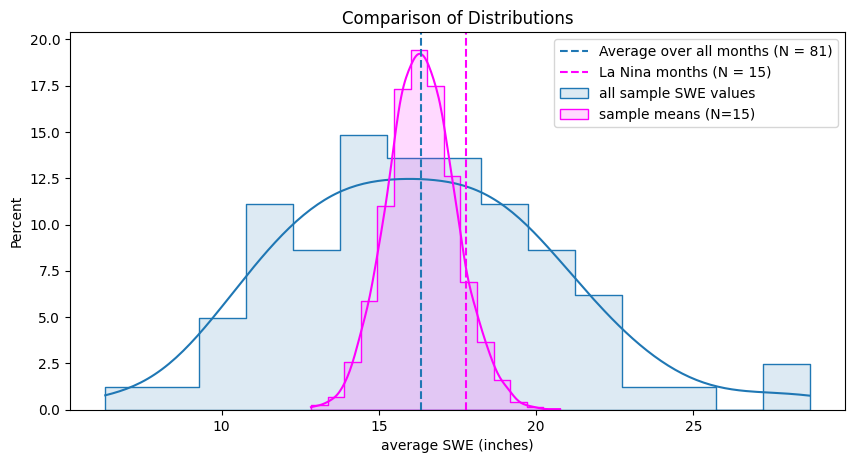

In [12]:
# plot the results

plt.subplots(1,1,figsize=(10,5))
plt.subplot(1,1,1)
sns.histplot(data=data['LovelandPass_April1SWE_inches'], 
             bins=15,
             kde=True, 
             element='step',
             stat='percent',
             alpha = .15,
             label='all sample SWE values',
             )
sns.histplot(data=bootstrap_means, 
             bins=15,
             color='fuchsia',
             kde=True, 
             element='step',
             stat='percent',
             alpha = .15,
             label='sample means (N=' + str(sample_size_N) + ')',
             )
plt.axvline(x=SWE_avg, linestyle='--',label='Average over all months (N = ' + str(N_SWE) + ')')
plt.axvline(x=SWE_avg_nina, linestyle='--',label='La Nina months (N = ' + str(N_SWE_nina) + ')',color='fuchsia')
plt.legend()
plt.xlabel('average SWE (inches)')
plt.title('Comparison of Distributions')


plt.show()

OK. The blue and the pink distributions are clearly very different...why? Well, the blue distribution is made of _individual samples_ while the pink distribution is made of _sample means_ of size N = 15. They are just totally different things!

With that said, they are related (through Central Limit Theorem).

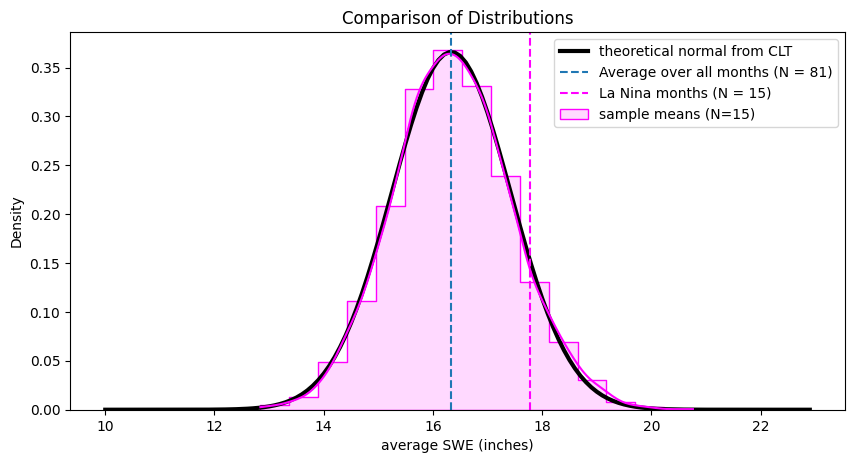

In [13]:
clt_mean  = SWE_avg
clt_sigma = SWE_std / np.sqrt(sample_size_N)
xvals = np.arange(10,23,.1)
yvals = stats.norm.pdf(xvals,clt_mean,clt_sigma)

plt.subplots(1,1,figsize=(10,5))
plt.subplot(1,1,1)
plt.plot(xvals,yvals,'-k',linewidth=3, label='theoretical normal from CLT')
sns.histplot(data=bootstrap_means, 
             bins=15,
             color='fuchsia',
             kde=True, 
             element='step',
             stat='density',
             alpha = .15,
             label='sample means (N=' + str(sample_size_N) + ')',
             )
plt.axvline(x=SWE_avg, linestyle='--',label='Average over all months (N = ' + str(N_SWE) + ')')
plt.axvline(x=SWE_avg_nina, linestyle='--',label='La Nina months (N = ' + str(N_SWE_nina) + ')',color='fuchsia')
plt.legend()
plt.xlabel('average SWE (inches)')
plt.title('Comparison of Distributions')


plt.show()

Now, let's compute the probability of getting a _sample mean_ SWE value above what we got (greater than the dashed pink line). This gives us a feeling for how crazy/odd our sample sample mean was.

In [14]:
auc_pink = len(np.where(bootstrap_means>SWE_avg_nina)[0])/len(bootstrap_means)
print(auc_pink)

0.0978


So, while not super rare, it is on the higher end of what might be expected.

## t-test
Instead of bootstrapping, one could use the t-test if we assume that the SWE values follow an underlying normal distirbution. We cannot use the z test as our sample size is too small (N = 15 samples) so we know the sample means will _not_ follow a normal distribution.

In [15]:
# La Nina results
tScore = (SWE_avg_nina-SWE_avg)/(SWE_std/np.sqrt(N_SWE_nina))
print('t-score from data = ' + str(np.round(tScore,3)))

# calculate the statistic
t_crit = stats.t.ppf(0.975,df = N_SWE_nina-1)
pValue = 1 - stats.t.cdf(tScore, df = N_SWE_nina-1)
print('t-crit from alpha = ' + str(np.round(t_crit,3)))
print('p-value from data = ' + str(np.round(pValue,3))) # notice how similar this is to the AUC from above!

t-score from data = 1.326
t-crit from alpha = 2.145
p-value from data = 0.103


Our conclusion? We cannot reject the null hypothesis that La Nina conditions cause the average SWE to change over Loveland Pass.

## Silly stuff.

Lastly, sometimes students want to do bootstrapping to estimate the standard deviation of the sample means, and then they put this into a z/t test. But why?? If you have gone through the effort of bootstrapping and you think it is justifiable, just use that distribution! Then you don't have to worry about normality assumptions, etc.